In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [10]:
data = pd.read_csv("C:/Users/kumar/Downloads/data_for_lr.csv")

In [11]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [12]:
data=data.dropna()

In [14]:
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:699]).reshape(199,1)


In [15]:
def forward(train_input,para):
    m=para["m"]
    c=para["c"]
    predic=np.multiply(m,train_input)+c
    return predic

In [16]:
def cost_func(predic,train_output):
    cost=np.mean((train_output-predic)**2)*0.5
    return cost

In [20]:
def back_prop(train_input,train_output,predic):
    deri=dict()
    df=predic-train_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    deri["dm"]=dm
    deri["dc"]=dc
    return deri

In [21]:
def update_para(para,deri,learning_rate):
    para["m"]=para["m"]-learning_rate*deri['dm']
    para["c"]=para["c"]-learning_rate*deri['dc']
    return para
    

In [27]:
def train(train_input,train_output,learning_rate,iters):
    para=dict()
    para["m"]=np.random.uniform(0,1)
    para["c"]=np.random.uniform(0,1)
    plt.figure()
    loss=list()
    
    for i in range(iters):
        predic=forward(train_input,para)
        cost=cost_func(predic,train_output)
        loss.append(cost)
        print(f"Iteration ={i+1}, loss = {cost}")
        fig, ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="original")
        ax.plot(train_input,predic,"+",label="training")  
        legend=ax.legend()
        plt.plot(train_input,train_output,"+",label="original")
        plt.plot(train_input,predic,"+",label="training")
        plt.show()
        deri=back_prop(train_input,train_output,predic)
        para=update_para(para,deri,learning_rate)
    return para,loss

Iteration =1, loss = 405.2869204068475


<Figure size 432x288 with 0 Axes>

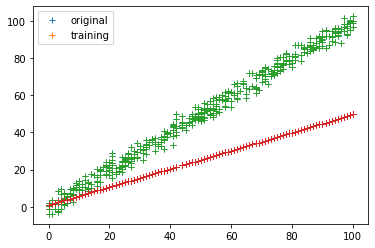

Iteration =2, loss = 186.11603966972004


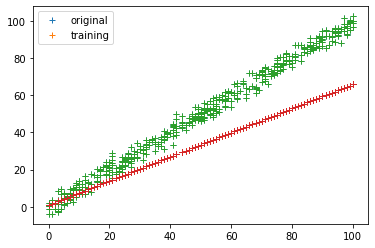

Iteration =3, loss = 86.67796324452262


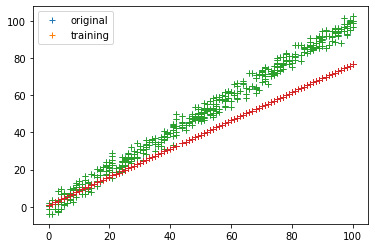

Iteration =4, loss = 41.56279275689215


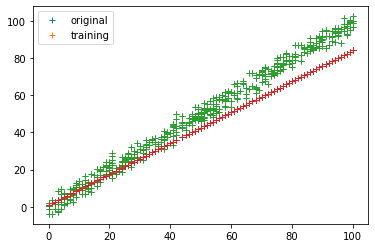

Iteration =5, loss = 21.09398486368074


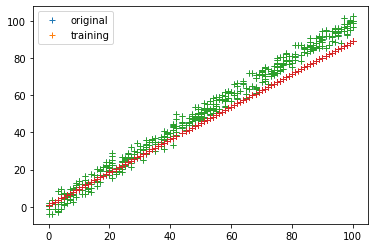

Iteration =6, loss = 11.807258979139748


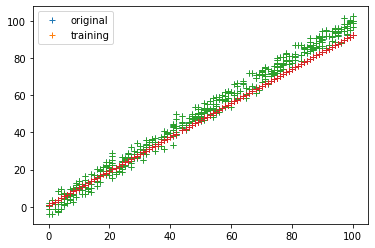

Iteration =7, loss = 7.593856087922836


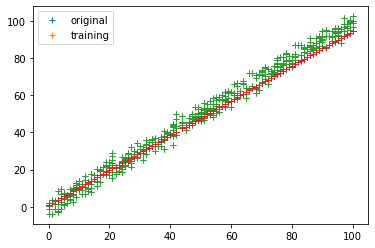

Iteration =8, loss = 5.6822254584541545


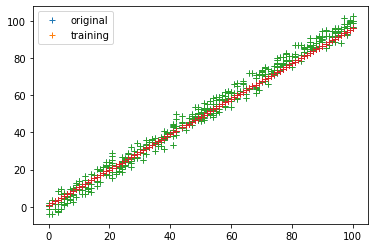

Iteration =9, loss = 4.814911453933902


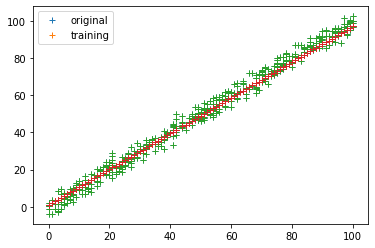

Iteration =10, loss = 4.4214050591363145


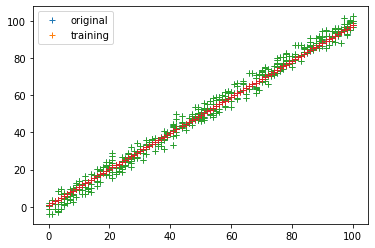

Iteration =11, loss = 4.242865701934129


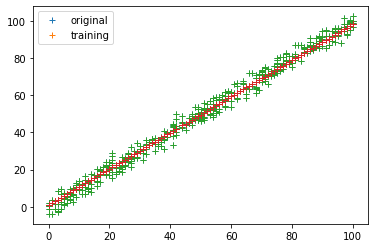

Iteration =12, loss = 4.161857128050733


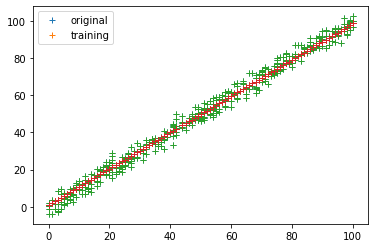

Iteration =13, loss = 4.125098378843563


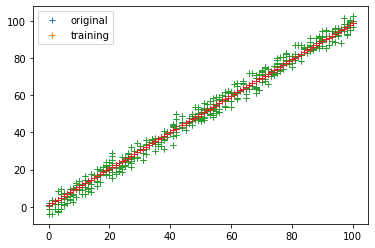

Iteration =14, loss = 4.108415824360295


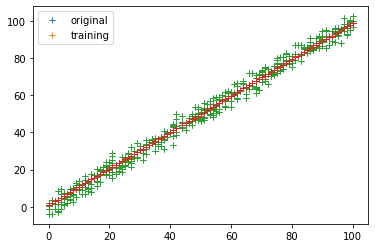

Iteration =15, loss = 4.100841861915838


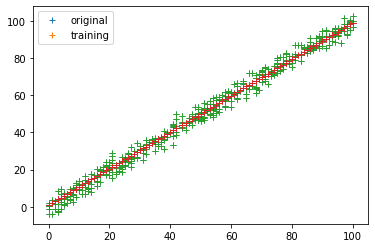

Iteration =16, loss = 4.09740047802378


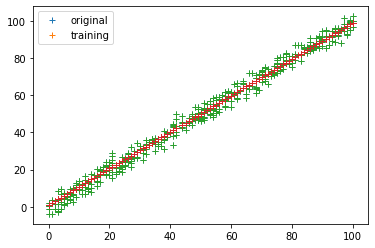

Iteration =17, loss = 4.095834049853693


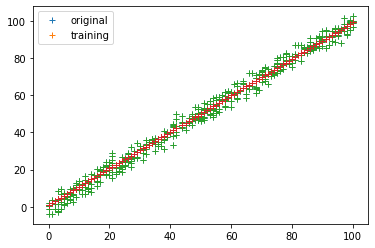

Iteration =18, loss = 4.095118291426759


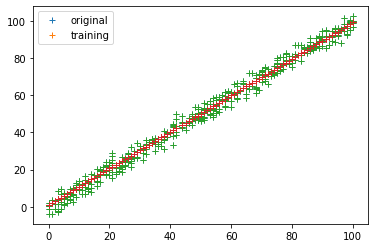

Iteration =19, loss = 4.094788483059831


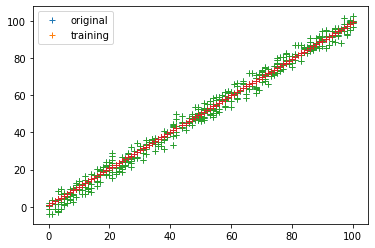

Iteration =20, loss = 4.094633780917915


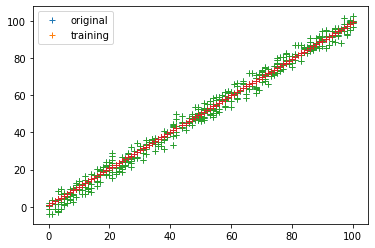

Iteration =21, loss = 4.094558524919519


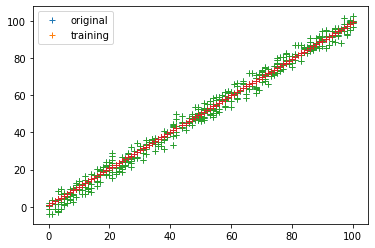

Iteration =22, loss = 4.0945193139797


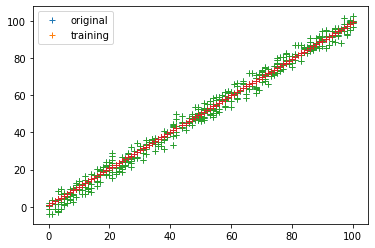

Iteration =23, loss = 4.094496456978137


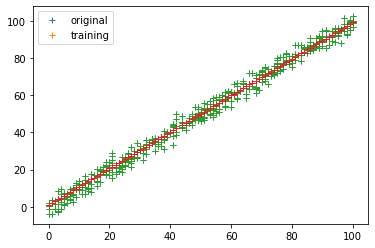

Iteration =24, loss = 4.0944810200317105


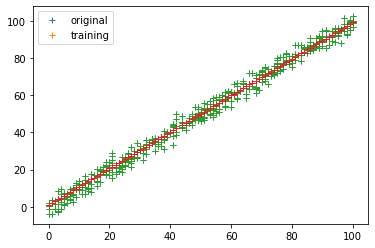

Iteration =25, loss = 4.094468949827749


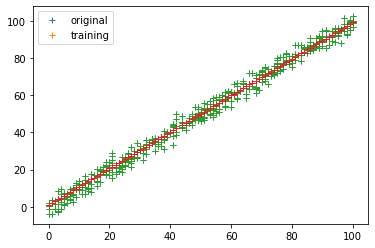

In [56]:
para,loss=train(train_input,train_output,0.0001,25)

In [57]:
print(para)


{'m': 0.9826691793864969, 'c': 0.9728935283087587}


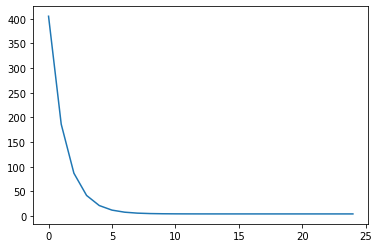

In [58]:
plt.plot(loss)


In [59]:
test_prediction=test_input*para['c']+para['c']

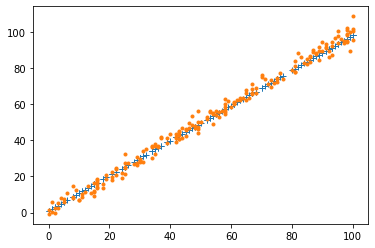

In [60]:
plt.plot(test_input,test_prediction,"+")
plt.plot(test_input,test_output,".")
plt.show()

In [61]:
cost_func(test_output,test_prediction)

4.436747161115865

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr_model=LinearRegression()

In [64]:
lr_model.fit(train_input,train_output)

LinearRegression()

In [66]:
lr_model.coef_

array([[1.0009993]])

In [69]:
lr_model.intercept_

array([-0.23603461])

In [70]:
test_prediction=lr_model.predict(test_input)

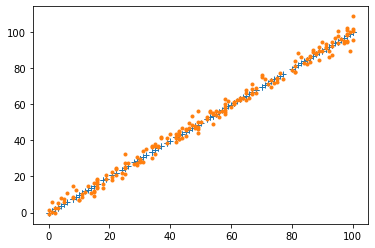

In [71]:
plt.plot(test_input,test_prediction,"+")
plt.plot(test_input,test_output,".")
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(test_output,test_prediction)
cost

8.03003159183537